In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg
from lets_plot import *

LetsPlot.setup_html(no_js=True)

In [2]:
### You don't need to use these settings yourself
### — they are just here to make the book look nicer!
# Set the plot style for prettier charts:
#plt.style.use(
#    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
#)

In [3]:
#Python Walkthrough 1.1
df = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows=1,
    na_values="***",
)

In [4]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.39,-0.54,-0.24,-0.31,-0.05,-0.18,-0.23,-0.27,-0.26,-0.31,-0.46,-0.43,-0.31,NaN,NaN,-0.20,-0.23,-0.34
1,1881,-0.31,-0.26,-0.07,-0.03,0.03,-0.34,0.08,-0.06,-0.29,-0.45,-0.38,-0.24,-0.19,-0.21,-0.33,-0.02,-0.11,-0.37
2,1882,0.25,0.20,0.01,-0.31,-0.24,-0.29,-0.28,-0.17,-0.26,-0.53,-0.34,-0.69,-0.22,-0.18,0.07,-0.18,-0.25,-0.38
3,1883,-0.58,-0.66,-0.15,-0.30,-0.26,-0.11,-0.06,-0.23,-0.34,-0.16,-0.45,-0.15,-0.29,-0.33,-0.64,-0.24,-0.13,-0.32
4,1884,-0.17,-0.11,-0.64,-0.59,-0.36,-0.41,-0.41,-0.51,-0.45,-0.45,-0.58,-0.47,-0.43,-0.40,-0.14,-0.53,-0.45,-0.49


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     145 non-null    float64
 11  Nov     144 non-null    float64
 12  Dec     144 non-null    float64
 13  J-D     144 non-null    float64
 14  D-N     143 non-null    float64
 15  DJF     144 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     144 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.6 KB


In [6]:
#Python Walkthrough 1.2

df = df.set_index("Year")
df.head()
df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
2020,1.59,1.70,1.67,1.40,1.27,1.14,1.10,1.12,1.19,1.21,1.59,1.19,1.35,1.36,1.56,1.44,1.12,1.33
2021,1.25,0.96,1.21,1.13,1.05,1.21,1.07,1.03,1.05,1.30,1.29,1.17,1.14,1.14,1.13,1.13,1.10,1.21
2022,1.25,1.17,1.41,1.09,1.02,1.13,1.06,1.17,1.15,1.31,1.10,1.06,1.16,1.17,1.19,1.17,1.12,1.19
2023,1.30,1.30,1.64,1.02,1.13,1.19,1.45,1.57,1.67,1.88,1.98,1.85,1.50,1.43,1.22,1.26,1.40,1.84
2024,1.68,1.93,1.78,1.80,1.45,1.54,1.42,1.42,1.58,1.72,NaN,NaN,NaN,NaN,1.82,1.67,1.46,NaN


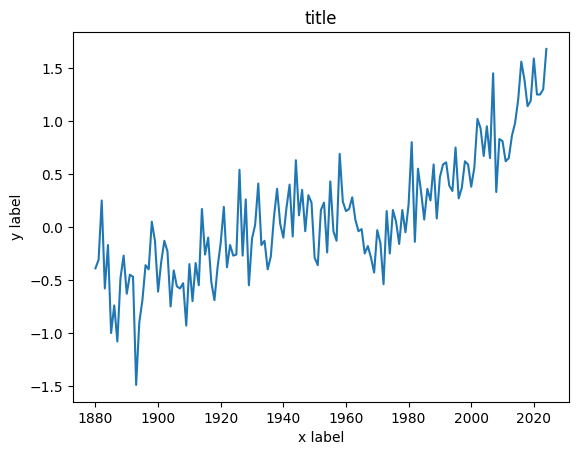

In [7]:
fig, ax = plt.subplots()
df["Jan"].plot(ax=ax)
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

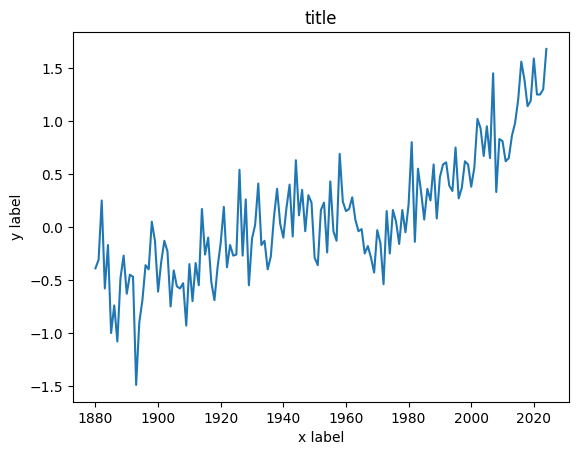

In [8]:
fig, ax = plt.subplots()
ax.plot(df.index, df["Jan"])
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

Text(0, 0.5, 'Annual temperature anomalies')

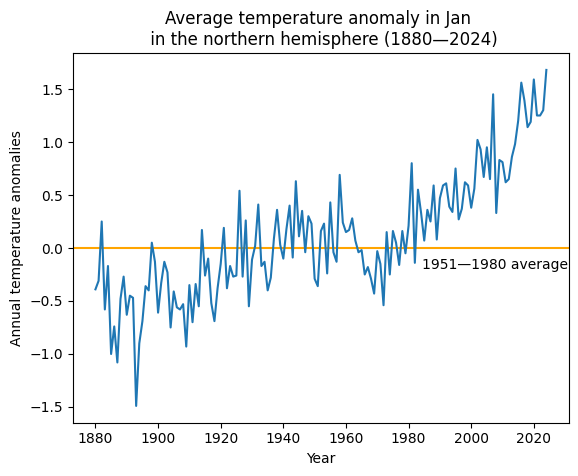

In [10]:
month = "Jan"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies")

Text(0, 0.5, 'Annual temperature anomalies')

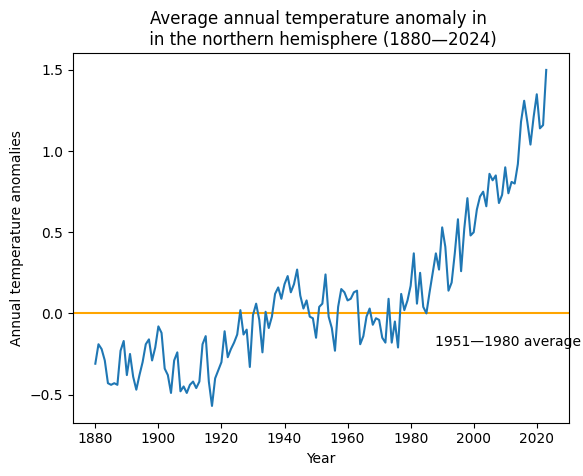

In [11]:
#Python Walkthrough 1.3
month = "J-D"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.68, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average annual temperature anomaly in \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies")

In [12]:
#Python Walkthrough 1.4
df["Period"] = pd.cut(
    df.index,
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)

In [13]:
df["Period"].tail(20)

Year
2005    1981—2010
2006    1981—2010
2007    1981—2010
2008    1981—2010
2009    1981—2010
2010    1981—2010
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
2018          NaN
2019          NaN
2020          NaN
2021          NaN
2022          NaN
2023          NaN
2024          NaN
Name: Period, dtype: category
Categories (3, object): ['1921—1950' < '1951—1980' < '1981—2010']

In [14]:
list_of_months = ["Jun", "Jul", "Aug"]
df[list_of_months].stack().head()

Year     
1880  Jun   -0.18
      Jul   -0.23
      Aug   -0.27
1881  Jun   -0.34
      Jul    0.08
dtype: float64

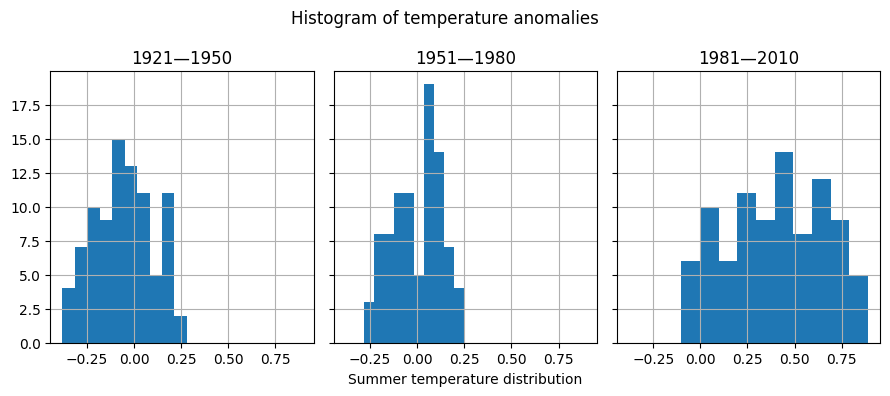

In [15]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 4), sharex=True, sharey=True)
for ax, period in zip(axes, df["Period"].dropna().unique()):
    df.loc[df["Period"] == period, list_of_months].stack().hist(ax=ax)
    ax.set_title(period)
plt.suptitle("Histogram of temperature anomalies")
axes[1].set_xlabel("Summer temperature distribution")
plt.tight_layout()

In [16]:
#Python Walkthrough 1.5
# Create a variable that has years 1951 to 1980, and months Jan to Dec (inclusive)
temp_all_months = df.loc[(df.index >= 1951) & (df.index <= 1980), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at this data:
temp_all_months

,Year,month,values
0,1951,Jan,-0.36
1,1951,Feb,-0.51
2,1951,Mar,-0.18
3,1951,Apr,0.06
4,1951,May,0.17
...,...,...,...
355,1980,Aug,0.10
356,1980,Sep,0.10
357,1980,Oct,0.12
358,1980,Nov,0.21


In [17]:
quantiles = [0.3, 0.7]
list_of_percentiles = np.quantile(temp_all_months["values"], q=quantiles)

print(f"The cold threshold of {quantiles[0]*100}% is {list_of_percentiles[0]}")
print(f"The hot threshold of {quantiles[1]*100}% is {list_of_percentiles[1]}")

The cold threshold of 30.0% is -0.1
The hot threshold of 70.0% is 0.1


In [18]:
#Python Walkthrough 1.6
# Create a variable that has years 1981 to 2010, and months Jan to Dec (inclusive)
temp_all_months = df.loc[(df.index >= 1981) & (df.index <= 2010), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at the start of this data data:
temp_all_months.head()

,Year,month,values
0,1981,Jan,0.80
1,1981,Feb,0.62
2,1981,Mar,0.68
3,1981,Apr,0.39
4,1981,May,0.18


In [19]:
entries_less_than_q30 = temp_all_months["values"] < list_of_percentiles[0]
proportion_under_q30 = entries_less_than_q30.mean()
print(
    f"The proportion under {list_of_percentiles[0]} is {proportion_under_q30*100:.2f}%"
)

The proportion under -0.1 is 1.94%


In [20]:
proportion_over_q70 = (temp_all_months["values"] > list_of_percentiles[1]).mean()
print(f"The proportion over {list_of_percentiles[1]} is {proportion_over_q70*100:.2f}%")

The proportion over 0.1 is 84.72%


In [21]:
#Python Walkthrough 1.7
temp_all_months = (
    df.loc[:, "DJF":"SON"]
    .stack()
    .reset_index()
    .rename(columns={"level_1": "season", 0: "values"})
)
temp_all_months["Period"] = pd.cut(
    temp_all_months["Year"],
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)
# Take a look at a cut of the data using `.iloc`, which provides position
temp_all_months.iloc[-135:-125]

,Year,season,values,Period
443,1991,DJF,0.51,1981—2010
444,1991,MAM,0.45,1981—2010
445,1991,JJA,0.42,1981—2010
446,1991,SON,0.32,1981—2010
447,1992,DJF,0.44,1981—2010
448,1992,MAM,0.30,1981—2010
449,1992,JJA,-0.04,1981—2010
450,1992,SON,-0.15,1981—2010
451,1993,DJF,0.37,1981—2010
452,1993,MAM,0.31,1981—2010


In [22]:
grp_mean_var = temp_all_months.groupby(["season", "Period"])["values"].agg(
    [np.mean, np.var]
)
grp_mean_var

/var/folders/1l/hnt371j52k73j2w03zpp03s80000gn/T/ipykernel_3739/29752492.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_mean_var = temp_all_months.groupby(["season", "Period"])["values"].agg(
/var/folders/1l/hnt371j52k73j2w03zpp03s80000gn/T/ipykernel_3739/29752492.py:1: FutureWarning: The provided callable <function mean at 0x10a0751b0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grp_mean_var = temp_all_months.groupby(["season", "Period"])["values"].agg(
/var/folders/1l/hnt371j52k73j2w03zpp03s80000gn/T/ipykernel_3739/29752492.py:1: FutureWarning: The provided callable <function var at 0x10a0753f0> is currently using SeriesGroupBy.var. In a future version of pan

mean       var
season Period                       
DJF    1921—1950 -0.026207  0.057303
       1951—1980 -0.002333  0.050494
       1981—2010  0.524333  0.079646
JJA    1921—1950 -0.052414  0.021290
       1951—1980 -0.000333  0.014631
       1981—2010  0.400333  0.067727
MAM    1921—1950 -0.041724  0.031236
       1951—1980  0.000333  0.025245
       1981—2010  0.510333  0.076238
SON    1921—1950  0.083103  0.027751
       1951—1980 -0.001000  0.026258
       1981—2010  0.429333  0.111731

In [23]:
min_year = 1880
(
    ggplot(temp_all_months, aes(x="Year", y="values", color="season"))
    + geom_abline(slope=0, color="black", size=1)
    + geom_line(size=1)
    + labs(
        title=f"Average annual temperature anomaly in \n in the northern hemisphere ({min_year}—{temp_all_months['Year'].max()})",
        y="Annual temperature anomalies",
    )
    + scale_x_continuous(format="d")
    + geom_text(
        x=min_year, y=0.1, label="1951—1980 average", hjust="left", color="black"
    )
)

In [ ]:
#Python Walkthrough 1.8
df_co2 = pd.read_csv("D:\360MoveData\Users\75903\Desktop\SuYibo-Homework\Practice1 SuYibo/CO2-data.csv")
df_co2.head()

,Year,Month,Monthly average,Interpolated,Trend
0,1958,3,315.71,315.71,314.62
1,1958,4,317.45,317.45,315.29
2,1958,5,317.50,317.50,314.71
3,1958,6,-99.99,317.10,314.85
4,1958,7,315.86,315.86,314.98


In [28]:
df_co2_june = df_co2.loc[df_co2["Month"] == 6]
df_co2_june.head()

,Year,Month,Monthly average,Interpolated,Trend
3,1958,6,-99.99,317.10,314.85
15,1959,6,318.15,318.15,315.92
27,1960,6,319.59,319.59,317.36
39,1961,6,319.77,319.77,317.48
51,1962,6,320.55,320.55,318.27


In [29]:
df_temp_co2 = pd.merge(df_co2_june, df, on="Year")
df_temp_co2[["Year", "Jun", "Trend"]].head()

,Year,Jun,Trend
0,1958,0.05,314.85
1,1959,0.14,315.92
2,1960,0.18,317.36
3,1961,0.18,317.48
4,1962,-0.13,318.27


In [30]:
(
    ggplot(df_temp_co2, aes(x="Jun", y="Trend"))
    + geom_point(color="black", size=3)
    + labs(
        title="Scatterplot of temperature anomalies vs carbon dioxide emissions",
        y="Carbon dioxide levels (trend, mole fraction)",
        x="Temperature anomaly (degrees Celsius)",
    )
)

In [31]:
df_temp_co2[["Jun", "Trend"]].corr(method="pearson")

,Jun,Trend
Jun,1.00000,0.91495
Trend,0.91495,1.00000


In [32]:
(
    ggplot(df_temp_co2, aes(x="Year", y="Jun"))
    + geom_line(size=1)
    + labs(
        title="June temperature anomalies",
    )
    + scale_x_continuous(format="d")
)

In [33]:
base_plot = ggplot(df_temp_co2) + scale_x_continuous(format="d")
plot_p = (
    base_plot
    + geom_line(aes(x="Year", y="Jun"), size=1)
    + labs(title="June temperature anomalies")
)
plot_q = (
    base_plot
    + geom_line(aes(x="Year", y="Trend"), size=1)
    + labs(title="Carbon dioxide emissions")
)
gggrid([plot_p, plot_q], ncol=2)